# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Afif Hamzah
- **Email:** a281ybm018@devacademy.id
- **ID Dicoding:** afifhamzah17

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam dataset Bike Sharing?

2. Apa faktor yang mempengaruhi durasi peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kagglehub

## Data Wrangling

### Gathering Data

# Tabel Day

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")
print("Path to dataset files:", path)
# karena ada 2 tabel maka kita load satu satu
# Membaca dataset day
day_df = pd.read_csv(path + "/day.csv")
# Menampilkan beberapa baris pertama tabel day
day_df.head()
# Membaca dataset hour
hour_df = pd.read_csv(path + "/hour.csv")
hour_df.head()

100%|██████████| 286k/286k [00:00<00:00, 67.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

# Memeriksa Tabel Day

In [5]:
# Memeriksa informasi dataset day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [20]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Memeriksa Tabel Hour

In [10]:
# Memeriksa informasi dataset hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


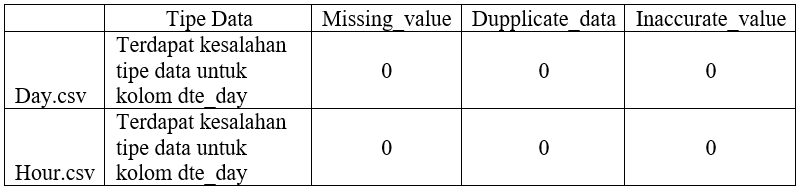

**Insight**

* Setelah melakukan tahap assessing data, dapat disimpulkan seperti tabel diatas kedua data ini memiliki satu kesalahan yaitu pada tipe data.  Tipe data untuk kolom dte_day pada kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

### Cleaning Data

# Membersihkan Tabel Day

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# Membersihkan Tabel Hour

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada kedua tabel, kolom yang sebelumnya memiliki tipe data objek (yang digunakan untuk tipe string) telah dibersihkan dan diubah menjadi tipe datetime. Perubahan ini penting karena tipe data objek dapat menyebabkan masalah dalam analisis, seperti kesulitan dalam penyortiran, perhitungan, atau pengelompokan berdasarkan waktu. Dengan mengonversi kolom tersebut ke tipe datetime, analisis menjadi lebih akurat dan memungkinkan operasi berbasis waktu seperti filter tanggal, perhitungan selisih waktu, dan agregasi data berdasarkan hari, bulan, atau tahun dapat dilakukan dengan tepat.

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


# Analisis Univariate: Distribusi Data

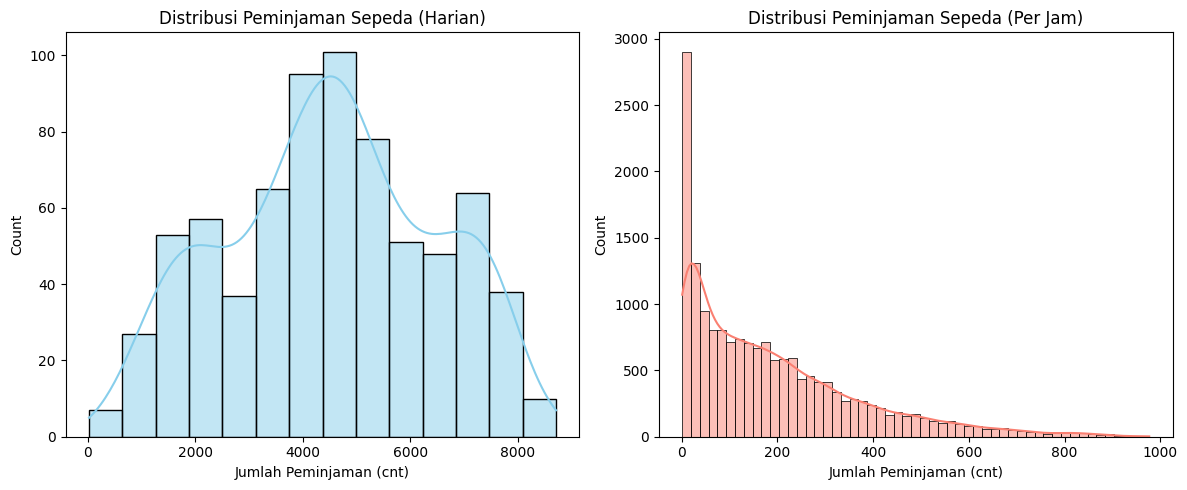

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(day_df['cnt'], kde=True, color='skyblue')
plt.title('Distribusi Peminjaman Sepeda (Harian)')
plt.xlabel('Jumlah Peminjaman (cnt)')

plt.subplot(1, 2, 2)
sns.histplot(hour_df['cnt'], kde=True, color='salmon')
plt.title('Distribusi Peminjaman Sepeda (Per Jam)')
plt.xlabel('Jumlah Peminjaman (cnt)')

plt.tight_layout()
plt.show()


# Analisis Bivariate: Visualisasi Hubungan Antar Variabel

**Boxplot jumlah peminjaman berdasarkan kondisi cuaca (weathersit) di data harian**

<ipython-input-23-18d667f8a31b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set3')


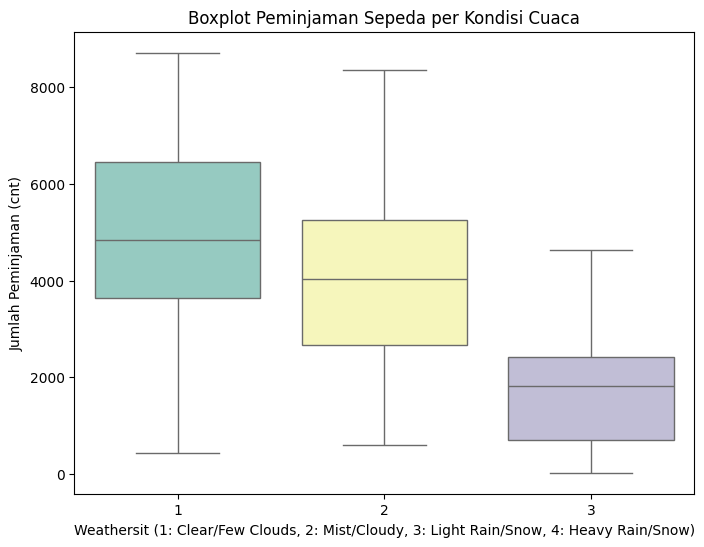

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set3')
plt.title('Boxplot Peminjaman Sepeda per Kondisi Cuaca')
plt.xlabel('Weathersit (1: Clear/Few Clouds, 2: Mist/Cloudy, 3: Light Rain/Snow, 4: Heavy Rain/Snow)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

**Scatter Plot hubungan antara suhu (temp) dan jumlah peminjaman di data per jam**

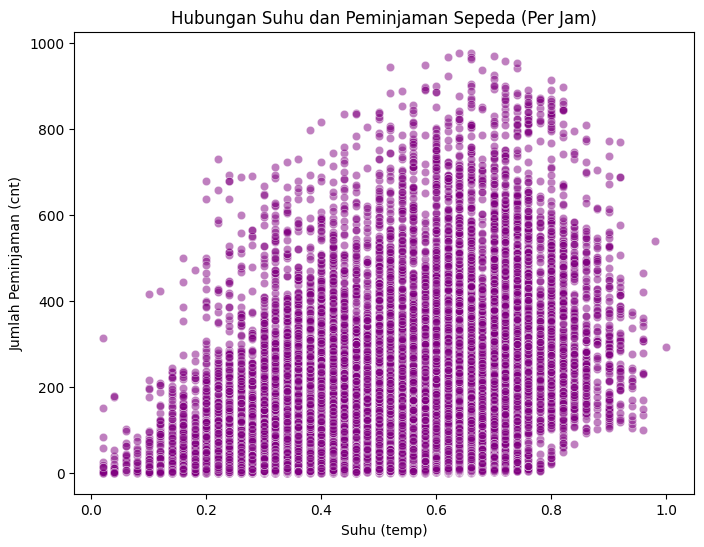

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, alpha=0.5, color='purple')
plt.title('Hubungan Suhu dan Peminjaman Sepeda (Per Jam)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

**Scatter Plot hubungan antara suhu yang dirasakan (atemp) dan jumlah peminjaman**

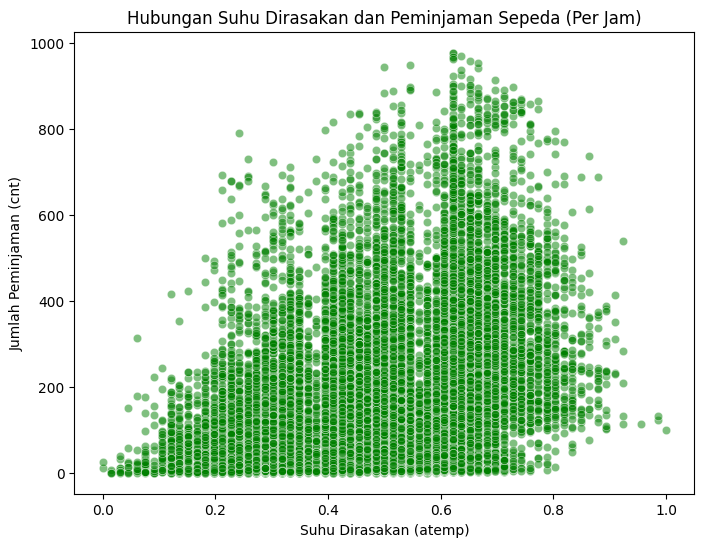

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='atemp', y='cnt', data=hour_df, alpha=0.5, color='green')
plt.title('Hubungan Suhu Dirasakan dan Peminjaman Sepeda (Per Jam)')
plt.xlabel('Suhu Dirasakan (atemp)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

**Scatter Plot hubungan antara kelembapan (hum) dan jumlah peminjaman di data harian**

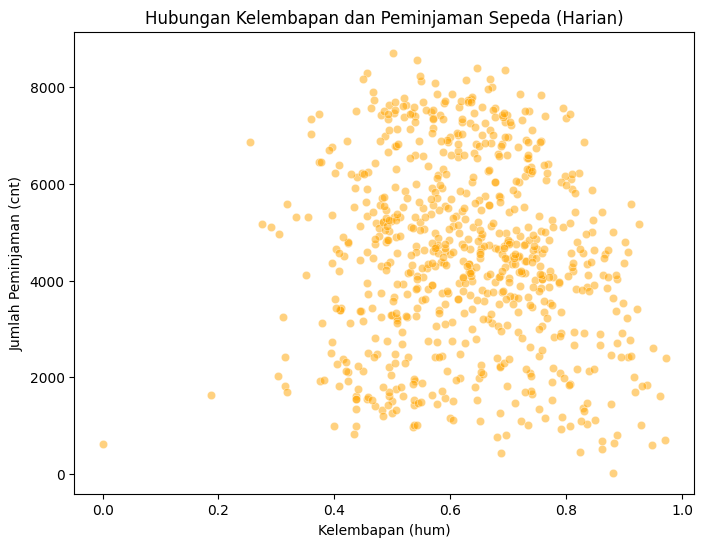

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='hum', y='cnt', data=day_df, alpha=0.5, color='orange')
plt.title('Hubungan Kelembapan dan Peminjaman Sepeda (Harian)')
plt.xlabel('Kelembapan (hum)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

# Agregasi Data Berdasarkan Kategori

**Agregasi berdasarkan kondisi cuaca (weathersit)**

In [27]:
weather_group = day_df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'std']).reset_index()
print("---- Agregasi Peminjaman Sepeda Berdasarkan Kondisi Cuaca (weathersit) ----")
print(weather_group)

---- Agregasi Peminjaman Sepeda Berdasarkan Kondisi Cuaca (weathersit) ----
   weathersit         mean  median          std
0           1  4876.786177  4844.0  1879.483989
1           2  4035.862348  4040.0  1809.109918
2           3  1803.285714  1817.0  1240.284449


**Agregasi berdasarkan musim**

In [28]:
season_group = day_df.groupby('season')['cnt'].agg(['mean', 'median', 'std']).reset_index()
print("\n---- Agregasi Peminjaman Sepeda Berdasarkan Musim ----")
print(season_group)


---- Agregasi Peminjaman Sepeda Berdasarkan Musim ----
   season         mean  median          std
0       1  2604.132597  2209.0  1399.942119
1       2  4992.331522  4941.5  1695.977235
2       3  5644.303191  5353.5  1459.800381
3       4  4728.162921  4634.5  1699.615261


**Agregasi berdasarkan hari kerja (workingday) untuk melihat perbedaan antara hari kerja dan non-hari kerja**

In [29]:
workingday_group = day_df.groupby('workingday')['cnt'].agg(['mean', 'median', 'std']).reset_index()
print("\n---- Agregasi Peminjaman Sepeda Berdasarkan Hari Kerja ----")
print(workingday_group)


---- Agregasi Peminjaman Sepeda Berdasarkan Hari Kerja ----
   workingday         mean  median          std
0           0  4330.168831  4459.0  2052.141245
1           1  4584.820000  4582.0  1878.415583


# Analisis Korelasi: Heatmap Korelasi Variabel Numerik

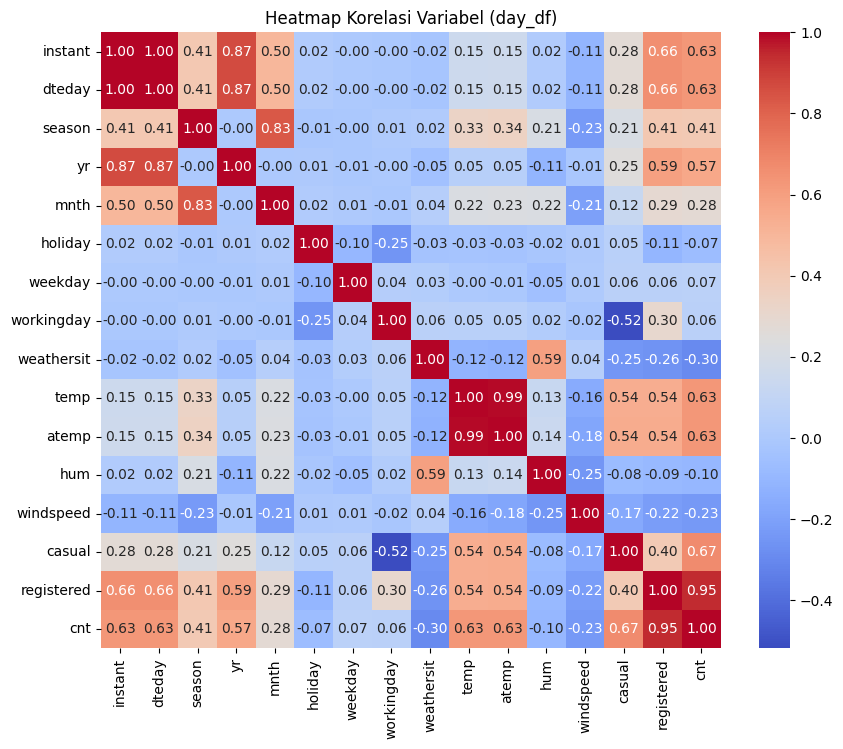

In [30]:
plt.figure(figsize=(10,8))
corr_matrix = day_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel (day_df)')
plt.show()

# Boxplot Berdasarkan Musim

<ipython-input-32-e9473867b66e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_name', y='cnt', data=day_df, palette='pastel')


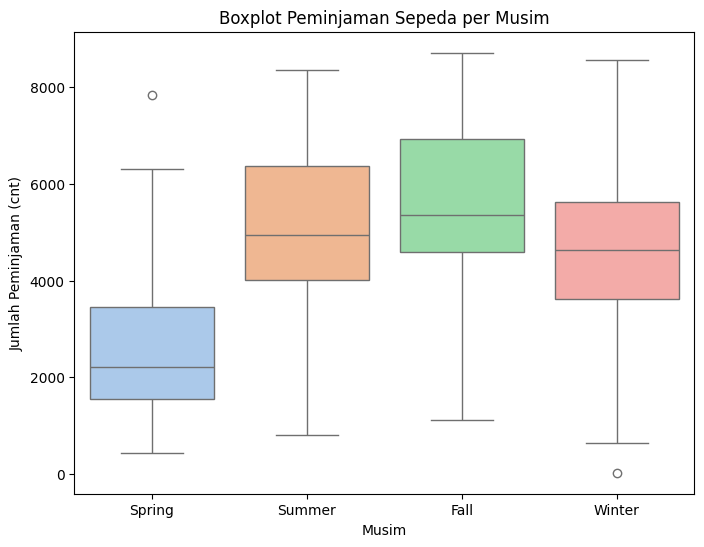

In [32]:
# Membuat mapping untuk season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Menambahkan kolom baru dengan nama musim
day_df['season_name'] = day_df['season'].map(season_mapping)

# Membuat boxplot dengan label season yang sudah dimapping
plt.figure(figsize=(8,6))
sns.boxplot(x='season_name', y='cnt', data=day_df, palette='pastel')
plt.title('Boxplot Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

**Insight:**
1. Pengaruh Kondisi Cuaca: Peminjaman sepeda cenderung lebih tinggi saat kondisi cuaca baik (Clear/Few Clouds) dan menurun secara signifikan pada kondisi cuaca buruk (Light Rain/Snow, Heavy Rain/Snow).
2. Hubungan dengan Variabel Lingkungan: Suhu (baik suhu langsung maupun suhu yang dirasakan) berpengaruh positif terhadap jumlah peminjaman, sementara kelembapan yang tinggi menunjukkan korelasi negatif.
3. Pola Musiman dan Perbedaan Hari Kerja: Terdapat pola musiman yang terlihat dari perbedaan jumlah peminjaman antar musim, serta sedikit perbedaan antara hari kerja dan non-hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-37-75e5dd9afb2d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_desc', y='cnt', data=day_df, palette='Set2')


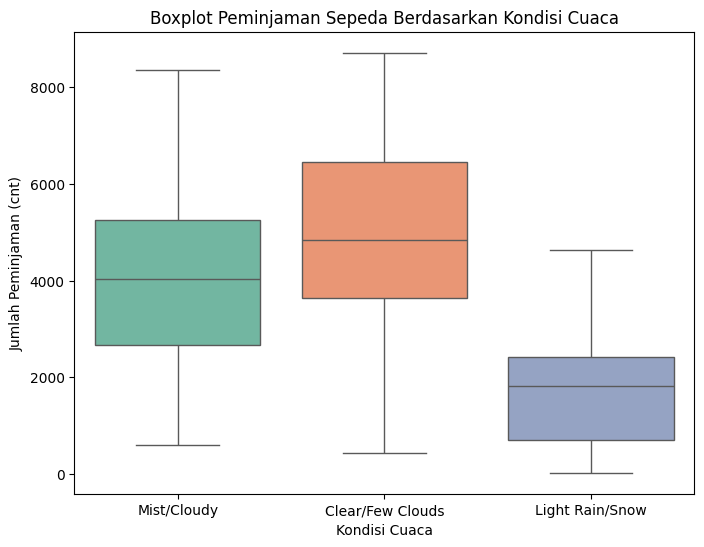

In [37]:
# Mapping agar lebih rapi
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

day_df['season_name'] = day_df['season'].map(season_mapping)
day_df['weather_desc'] = day_df['weathersit'].map(weather_mapping)

#Boxplot jumlah peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(8,6))
sns.boxplot(x='weather_desc', y='cnt', data=day_df, palette='Set2')
plt.title('Boxplot Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

<ipython-input-39-acf90558064e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_desc', y='cnt', data=avg_by_weather, palette='Set2')


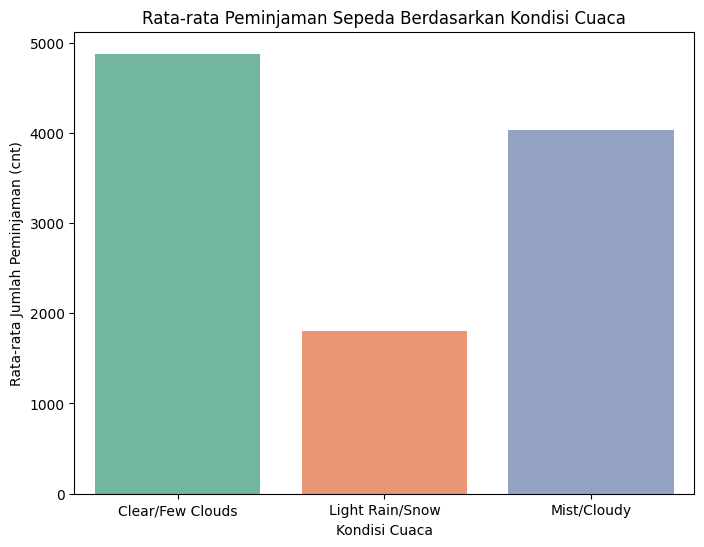

In [39]:
#Barplot rata-rata peminjaman per kondisi cuaca
avg_by_weather = day_df.groupby('weather_desc')['cnt'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='weather_desc', y='cnt', data=avg_by_weather, palette='Set2')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman (cnt)')
plt.show()

### Pertanyaan 2:

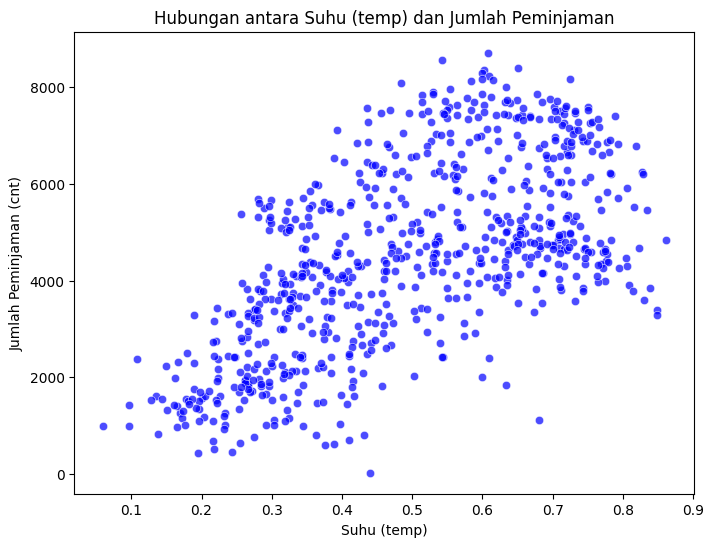

In [40]:
#Scatter plot antara suhu (temp) dan jumlah peminjaman
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='blue', alpha=0.7)
plt.title('Hubungan antara Suhu (temp) dan Jumlah Peminjaman')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

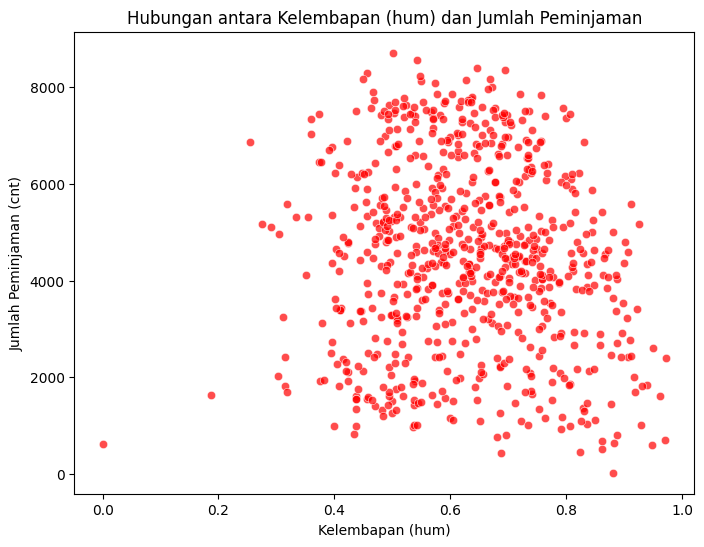

In [41]:
#Scatter plot antara kelembapan (hum) dan jumlah peminjaman
plt.figure(figsize=(8,6))
sns.scatterplot(x='hum', y='cnt', data=day_df, color='red', alpha=0.7)
plt.title('Hubungan antara Kelembapan (hum) dan Jumlah Peminjaman')
plt.xlabel('Kelembapan (hum)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()


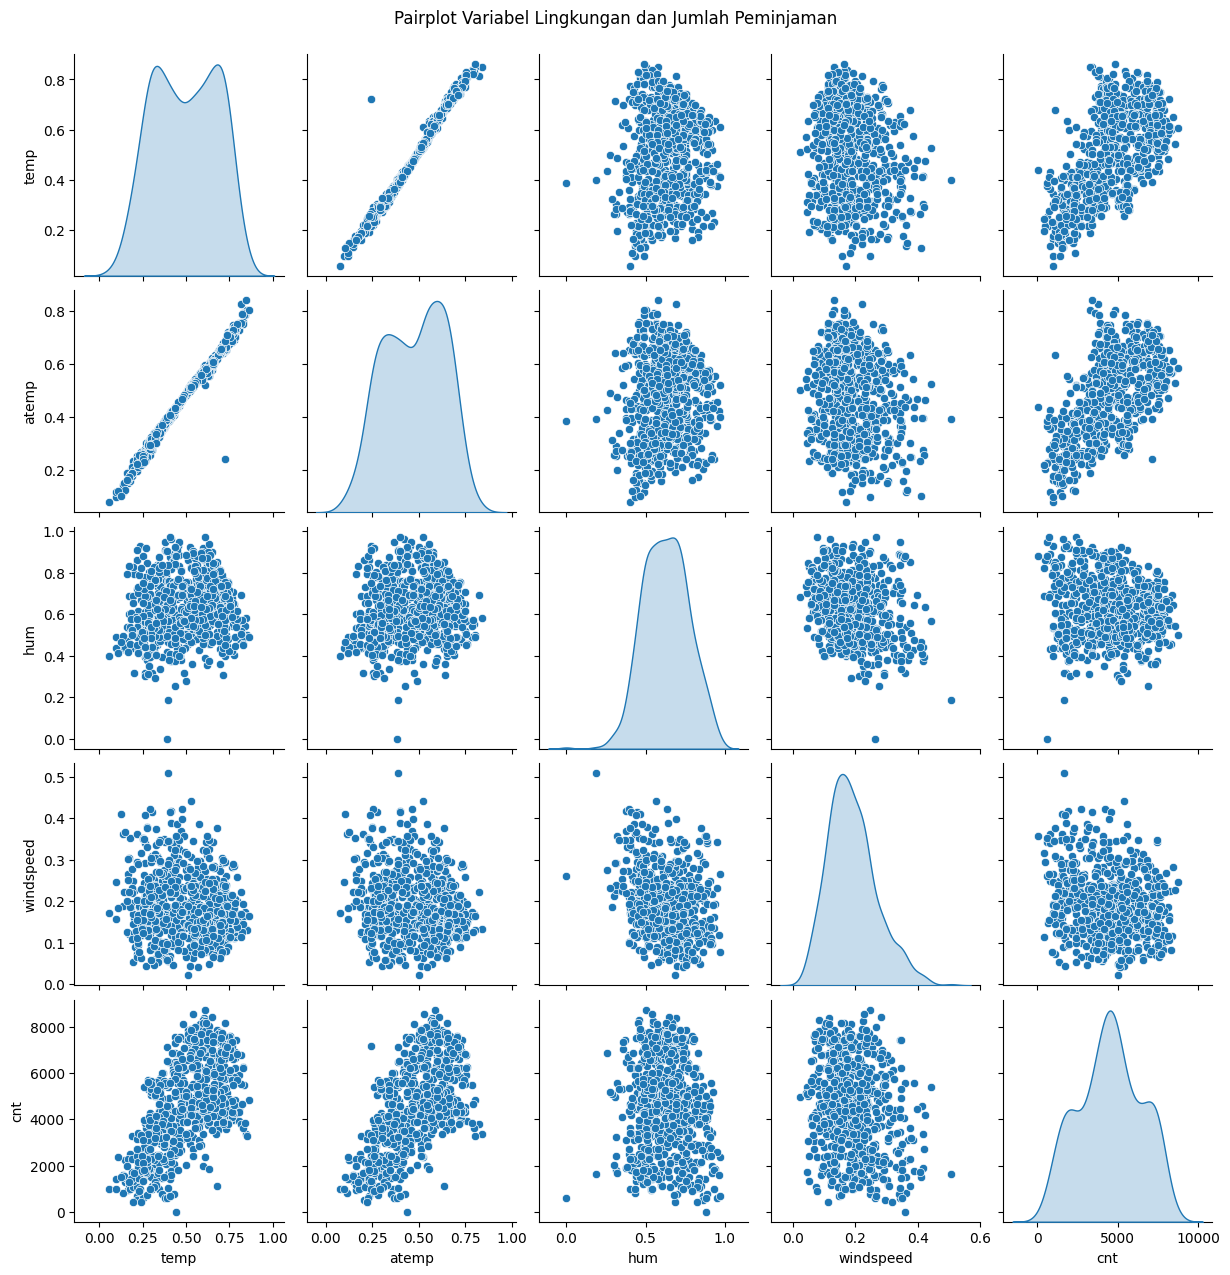

In [42]:
#Pairplot untuk variabel lingkungan dan jumlah peminjaman
sns.pairplot(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], diag_kind='kde')
plt.suptitle('Pairplot Variabel Lingkungan dan Jumlah Peminjaman', y=1.02)
plt.show()

**Insight:**

* Dari boxplot dan barplot, terlihat bahwa kondisi cuaca yang baik (Clear/Few Clouds) menghasilkan jumlah peminjaman yang lebih tinggi, sedangkan kondisi cuaca buruk (Heavy Rain/Snow) cenderung menurunkan peminjaman.
* Scatter plot dan pairplot menunjukkan bahwa suhu (temp & atemp)memiliki korelasi positif dengan peminjaman, sedangkan kelembapan (hum) dan kecepatan angin (windspeed) berpengaruh negatif terhadap jumlah peminjaman.

## Analisis Lanjutan (Opsional)

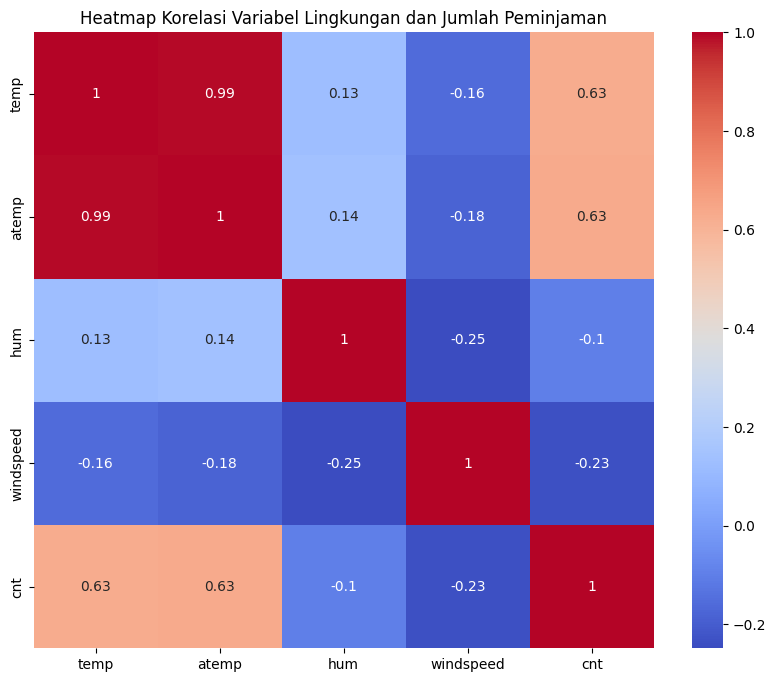

In [43]:
plt.figure(figsize=(10,8))
corr_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Lingkungan dan Jumlah Peminjaman')
plt.show()

## Conclusion

* Kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Dari visualisasi, kondisi cuaca yang cerah (Clear/Few Clouds) menghasilkan peminjaman yang lebih tinggi, sedangkan kondisi cuaca yang buruk (Heavy Rain/Snow) menurunkan peminjaman sepeda.

* Faktor lingkungan seperti suhu, suhu yang dirasakan, kelembapan, dan kecepatan angin mempengaruhi jumlah peminjaman sepeda. Suhu yang lebih tinggi berkorelasi positif dengan peminjaman, sedangkan kelembapan dan kecepatan angin yang tinggi berkorelasi negatif.